In [2]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.func.support_functions import *

## Data import and manipulation

In [3]:
#Import Schizophrenia data
shizophrenia_p, shizophrenia_c = load_data()

## Full activity time series 

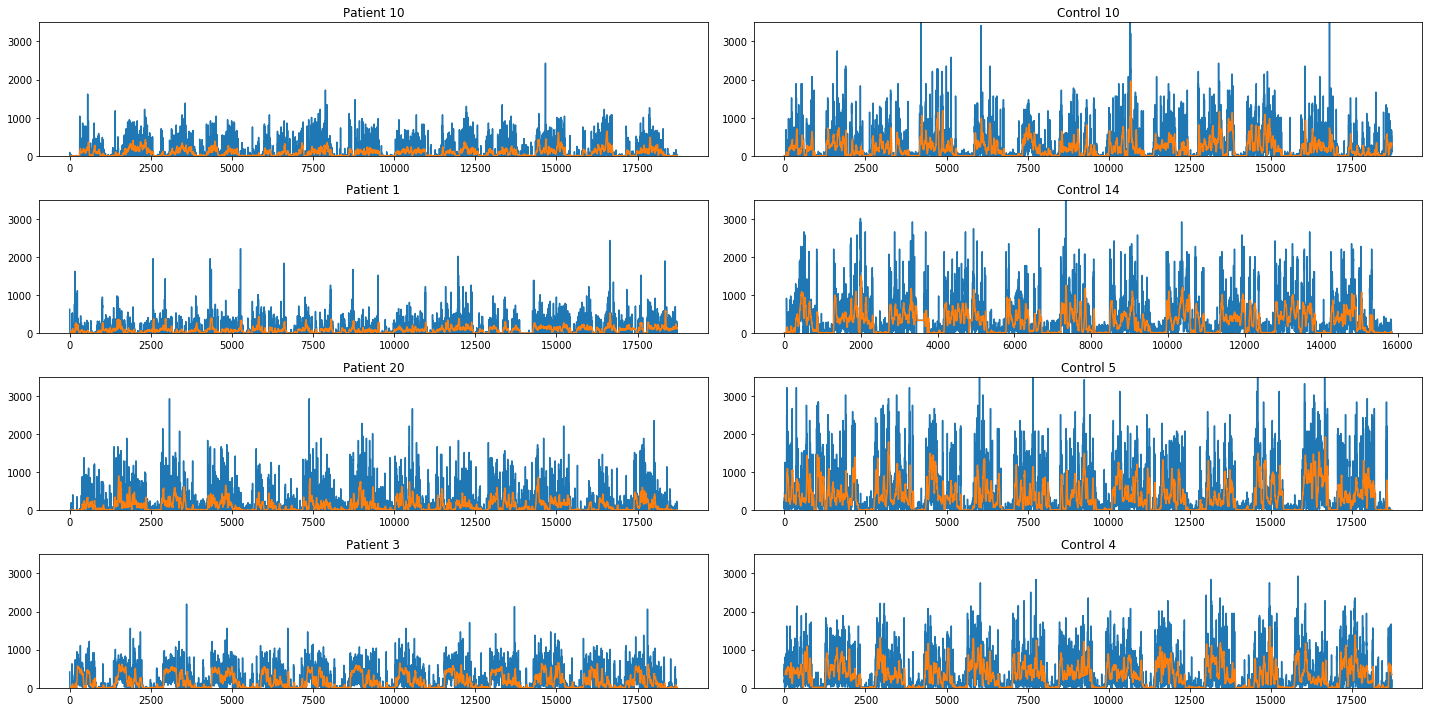

In [13]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(shizophrenia_p[10])
ax0.plot(shizophrenia_p[10].rolling(window=30).mean())
ax0.set_ylim([0,3500])
ax0.set_title('Patient 10')
ax1.plot(shizophrenia_c[10])
ax1.plot(shizophrenia_c[10].rolling(window=30).mean())
ax1.set_ylim([0,3500])
ax1.set_title('Control 10')
ax2.plot(shizophrenia_p[1])
ax2.plot(shizophrenia_p[1].rolling(window=30).mean())
ax2.set_ylim([0,3500])
ax2.set_title('Patient 1')
ax3.plot(shizophrenia_c[14])
ax3.plot(shizophrenia_c[14].rolling(window=30).mean())
ax3.set_ylim([0,3500])
ax3.set_title('Control 14')
ax4.plot(shizophrenia_p[20])
ax4.plot(shizophrenia_p[20].rolling(window=30).mean())
ax4.set_ylim([0,3500])
ax4.set_title('Patient 20')
ax5.plot(shizophrenia_c[5])
ax5.plot(shizophrenia_c[5].rolling(window=30).mean())
ax5.set_ylim([0,3500])
ax5.set_title('Control 5')
ax6.plot(shizophrenia_p[3])
ax6.plot(shizophrenia_p[3].rolling(window=30).mean())
ax6.set_ylim([0,3500])
ax6.set_title('Patient 3')
ax7.plot(shizophrenia_c[4])
ax7.plot(shizophrenia_c[4].rolling(window=30).mean())
ax7.set_ylim([0,3500])
ax7.set_title('Control 4')
fig.tight_layout()

Figure 1 shows patients data on the left side and data of the control group on the right side.
The data was recorded over arround 14 days per person. The data reveals the circadian rhythm of a person. The periods in which a person is active or awake appear as blocks. The periods between the blocks are seen as resting periods. They have a lower mean value and lower variance and they appear to be shorter in time than the active periods. These observations match with known human behavior. The time a persons is asleep is with 6-8 hours (source) shorter than the time she is awake. 
The transition between these to periods appear quite instantly. As soon as a person lays down to rest or sleep, one reduce movements or even lays still for several minutes. 
Thus, there is a abrupt change of mean and variance in time, which might indicate heteroscedasticity. 
Heteroscedasticity will be analysed at a later stage.

The circadian cycles one can observe here is of course affected by a day and night rhythm, as this comes with social norms but can of course differ from person to person. In conclusion, the time series follows most certainly some sort of seasonality. 

A first visual comparison shows a difference in the scale. The control group appears overall more active than the patients.
This will be further investigated when comparing the overall means of the time series. But the difference in scale appears to be mostly during the active periods. 

Furthermore, the control groups seems to vary more in activity during their active periods, while the patients seem to vary more over the whole time. 

It can be observed, that the control groups seems to stick more to a rest-active cycle than the patients. 
It is easier to see, when a patient is resting or active or when the person went to bed. The patients don't seem to stick to this cycle. Especially patient 10 and patient 1 have a very low average activity with little change between day and night.
This observation might fit to the diagnosed characteristics of patients with a schizophrenic condition. The patient show a disturbed circadian cycle and behavioral abnormalilites. 

#### Key statements: 
* general description of the data, like varying variance, seasonality, heteroscedasticity
* First visual differences between patients and control like:
* lower mean activity 
* Disturbed circadian cycle  


### Comparison of mean activity

In [13]:
from sklearn.utils import resample
means_p = np.array([np.mean(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
means_c = np.array([np.mean(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])
boot_p = resample(means_p, replace = True, n_samples = 100, random_state=0 )
boot_c = resample(means_c, replace = True, n_samples = 100, random_state=0 )
var_p = np.array([np.var(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
var_c = np.array([np.var(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])
boot_var_p = resample(var_p, replace = True, n_samples = 100, random_state=0 )
boot_var_c = resample(var_c, replace = True, n_samples = 100, random_state=0 )

Text(0.5,1,'Histogram of bootstrapped variance of time series')

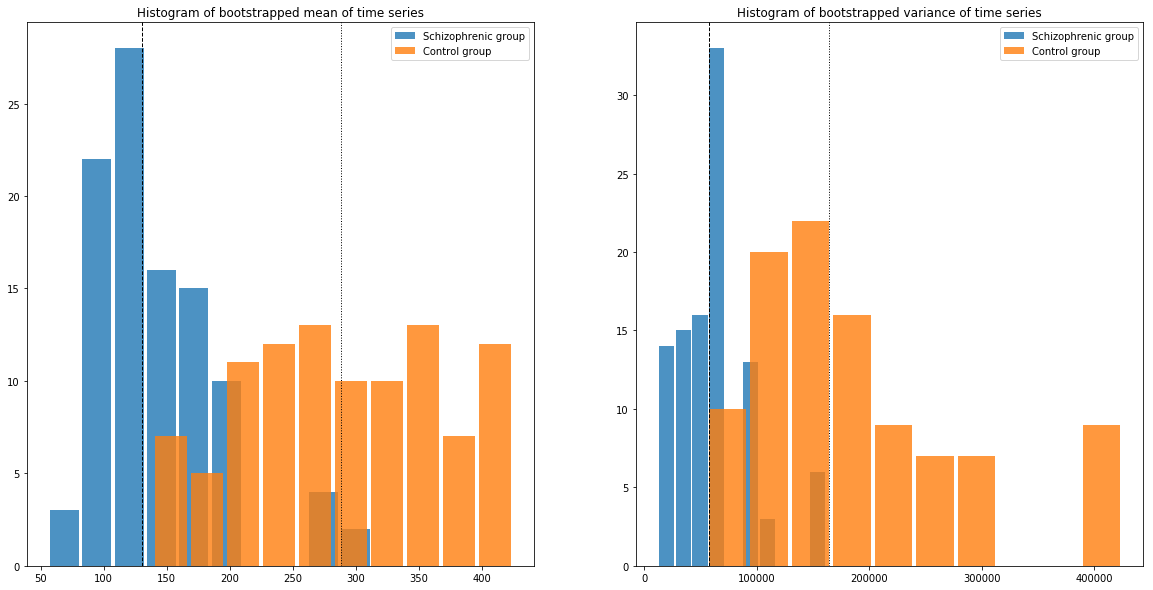

In [14]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.hist(boot_p, alpha=0.8,bins= 10 ,label = 'Schizophrenic group', rwidth=0.9) 
ax0.hist(boot_c, alpha=0.8,bins= 10 ,label = 'Control group', rwidth=0.9) 
ax0.axvline(np.median(boot_p), color='k', linestyle='dashed', linewidth=1)
ax0.axvline(np.median(boot_c), color='k', linestyle='dotted', linewidth=1)
ax0.legend()
ax0.set_title("Histogram of bootstrapped mean of time series") 

ax1.hist(boot_var_p, alpha=0.8,bins= 10 ,label = 'Schizophrenic group', rwidth=0.9) 
ax1.hist(boot_var_c, alpha=0.8,bins= 10 ,label = 'Control group', rwidth=0.9) 
ax1.axvline(np.median(boot_var_p), color='k', linestyle='dashed', linewidth=1)
ax1.axvline(np.median(boot_var_c), color='k', linestyle= 'dotted', linewidth=1)
ax1.legend()
ax1.set_title("Histogram of bootstrapped variance of time series") 


Figure 2 shows a two histograms of the overall sample mean and the sample variance of each time series. To improve the parameter estimate, bootstrapping was applied to increase the sample size from 22 and 32 from the schizophrenic and control group to 50, respectively. 
The histograms show that the control group has indeed a higher overall mean and variance of activity than the schizophrenic group. 
As we can see there is already a difference in the first to moments of the two groups. In the following, the sample distribution of the data is analyzed. 
According to the histograms, the two groups are indeed generated by different distributions, but this has to be further investigated by analysing the daily and nightly structure of the data. Moreover it is up to analyse how the time series are distributed, and if the active and resting period are also generated by different distributions. 
REWRITE!
#### Key statement
* schizophrenic and control group most likely generated by different distribution, classification possible 

## Analysis of the sample distribution of the time series

To get a better understanding of the underlying distribution of the time series, its sample distributions are analyzed. 
The time series is non negative, since the activity itself cannot be negative. This natural property of the data could possibly restrict a sample distribution. 
The sensor measure the activity averaged over 60 seconds. Not clear how the sensor measure only little movements? 
More! 

Maybe rectified Gaussian Distributed, indicated by the differenciated version, that we can assume a normal distribution? Maybe more indicators?

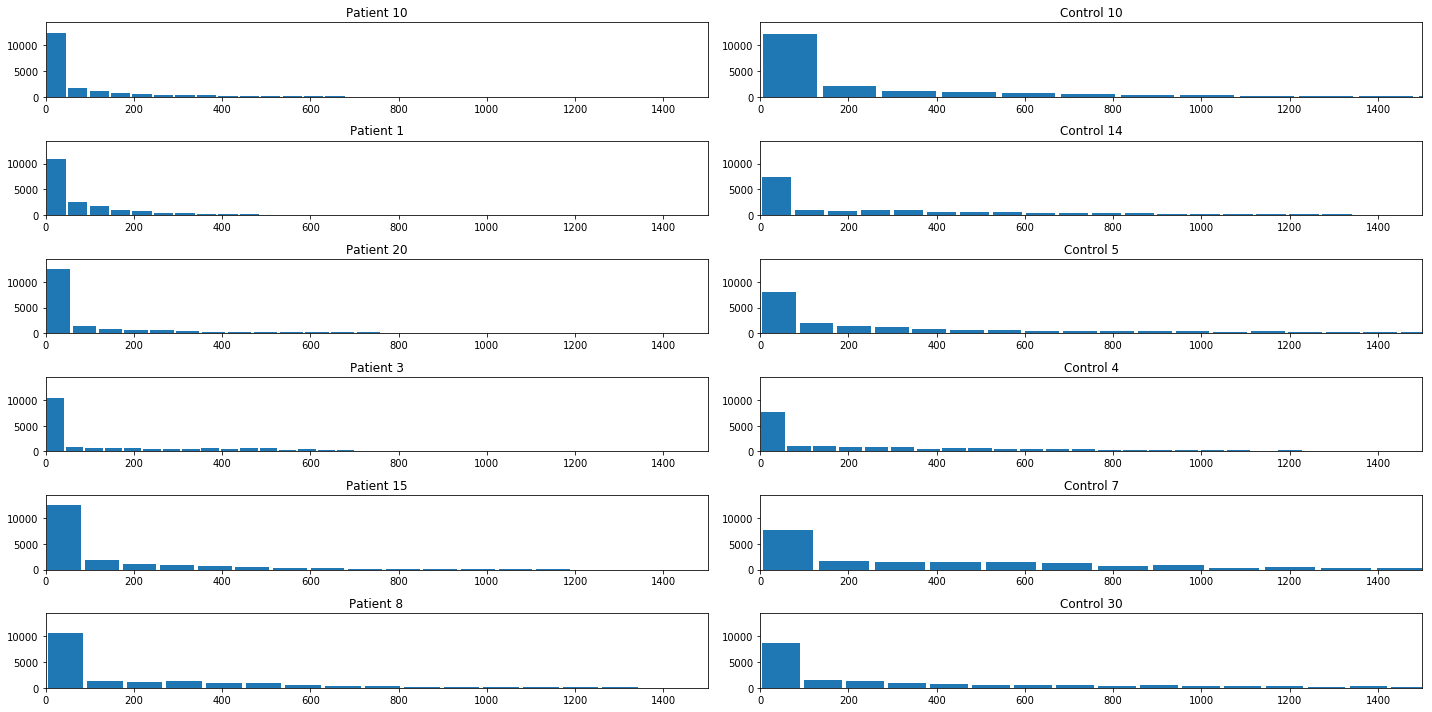

In [12]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7), (ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(20, 10))
ax0.hist(shizophrenia_p[10], bins = 50, rwidth=0.9)
ax0.set_title('Patient 10')
ax0.set_xlim([0,1500])
ax0.set_ylim([0,14500])
ax1.hist(shizophrenia_c[10], bins = 50, rwidth=0.9)
ax1.set_title('Control 10')
ax1.set_xlim([0,1500])
ax1.set_ylim([0,14500])
ax2.hist(shizophrenia_p[1], bins = 50, rwidth=0.9)
ax2.set_title('Patient 1')
ax2.set_xlim([0,1500])
ax2.set_ylim([0,14500])
ax3.hist(shizophrenia_c[14], bins = 50, rwidth=0.9)
ax3.set_title('Control 14')
ax3.set_xlim([0,1500])
ax3.set_ylim([0,14500])
ax4.hist(shizophrenia_p[20], bins = 50, rwidth=0.9)
ax4.set_title('Patient 20')
ax4.set_xlim([0,1500])
ax4.set_ylim([0,14500])
ax5.hist(shizophrenia_c[5], bins = 50, rwidth=0.9)
ax5.set_title('Control 5')
ax5.set_xlim([0,1500])
ax5.set_ylim([0,14500])
ax6.hist(shizophrenia_p[3], bins = 50, rwidth=0.9)
ax6.set_title('Patient 3')
ax6.set_xlim([0,1500])
ax6.set_ylim([0,14500])
ax7.hist(shizophrenia_c[4], bins = 50, rwidth=0.9)
ax7.set_title('Control 4')
ax7.set_xlim([0,1500])
ax7.set_ylim([0,14500])
ax8.hist(shizophrenia_p[15], bins = 50, rwidth=0.9)
ax8.set_title('Patient 15')
ax8.set_xlim([0,1500])
ax8.set_ylim([0,14500])
ax9.hist(shizophrenia_c[7], bins = 50, rwidth=0.9)
ax9.set_title('Control 7')
ax9.set_xlim([0,1500])
ax9.set_ylim([0,14500])
ax10.hist(shizophrenia_p[8], bins = 50, rwidth=0.9)
ax10.set_title('Patient 8')
ax10.set_xlim([0,1500])
ax10.set_ylim([0,14500])
ax11.hist(shizophrenia_c[30], bins = 50, rwidth=0.9)
ax11.set_title('Control 30')
ax11.set_xlim([0,1500])
ax11.set_ylim([0,14500])
fig.tight_layout()


Figure 3 shows 12 different histograms of the full time series of the patient group and control group. The patients histograms are plotted on left side, while the control groups' histograms are plotted on the right. The histograms are provided for 12 example time series.
Each histogram shows a very high amount of zeros. This might be due to the non-negativity of the data. 
Comparing the patient and control groups histograms shows, that the amount of zeros is higher for patients. Also, there are fewer observations higher than 800 in a patients time series compared to the control group. These observation match with the obersvations of the total mean and variance of each time series. Schizophrenic persons seem to be more inactive due to the higher number of zero activity. The activity of patients shows a smaller range compared to the mental healthy group.

## Analysis of the sample distribution of the differentiated time series


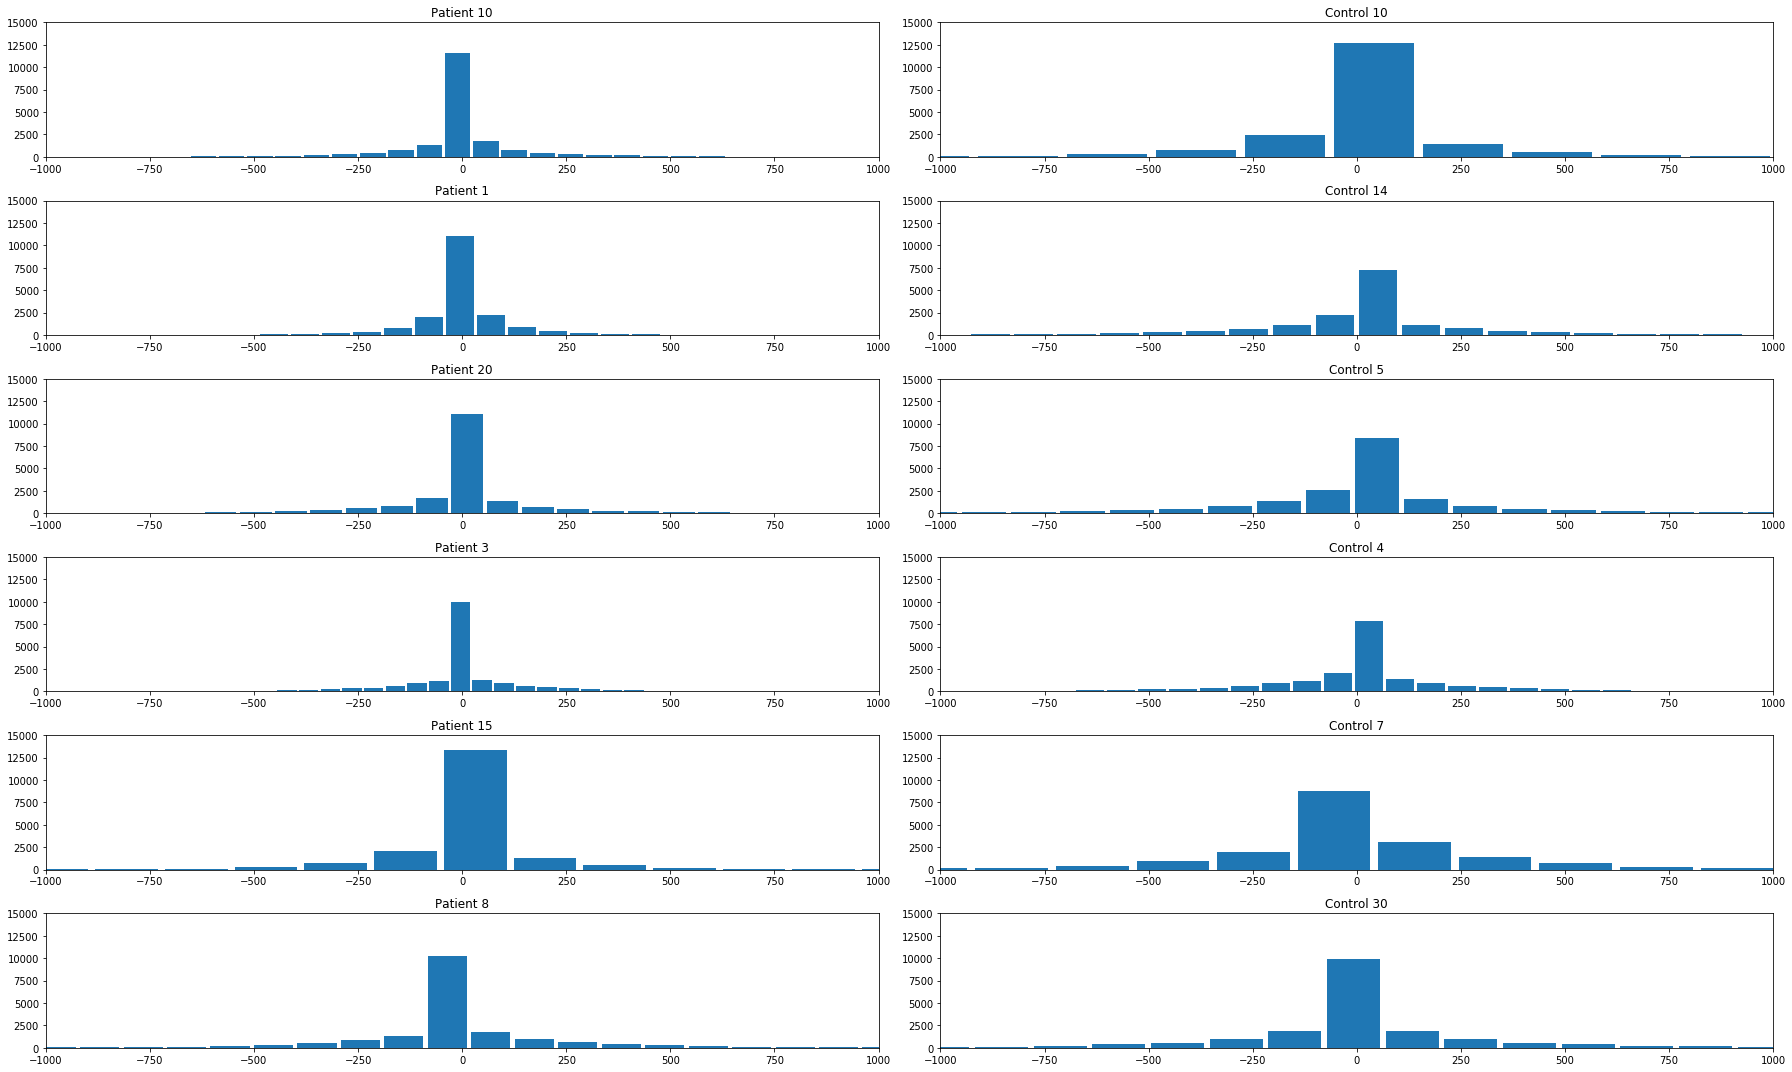

In [23]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7), (ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(25, 15))
ax0.hist(shizophrenia_p[10].diff()[1:], bins = 50, rwidth=0.9)
ax0.set_title('Patient 10')
ax0.set_xlim([-1000,1000])
ax0.set_ylim([0,15000])
ax1.hist(shizophrenia_c[10].diff()[1:], bins = 50, rwidth=0.9)
ax1.set_title('Control 10')
ax1.set_xlim([-1000,1000])
ax1.set_ylim([0,15000])
ax2.hist(shizophrenia_p[1].diff()[1:], bins = 50, rwidth=0.9)
ax2.set_title('Patient 1')
ax2.set_xlim([-1000,1000])
ax2.set_ylim([0,15000])
ax3.hist(shizophrenia_c[14].diff()[1:], bins = 50, rwidth=0.9)
ax3.set_title('Control 14')
ax3.set_xlim([-1000,1000])
ax3.set_ylim([0,15000])
ax4.hist(shizophrenia_p[20].diff()[1:], bins = 50, rwidth=0.9)
ax4.set_title('Patient 20')
ax4.set_xlim([-1000,1000])
ax4.set_ylim([0,15000])
ax5.hist(shizophrenia_c[5].diff()[1:], bins = 50, rwidth=0.9)
ax5.set_title('Control 5')
ax5.set_xlim([-1000,1000])
ax5.set_ylim([0,15000])
ax6.hist(shizophrenia_p[3].diff()[1:], bins = 50, rwidth=0.9)
ax6.set_title('Patient 3')
ax6.set_xlim([-1000,1000])
ax6.set_ylim([0,15000])
ax7.hist(shizophrenia_c[4].diff()[1:], bins = 50, rwidth=0.9)
ax7.set_title('Control 4')
ax7.set_xlim([-1000,1000])
ax7.set_ylim([0,15000])
ax8.hist(shizophrenia_p[15].diff()[1:], bins = 50, rwidth=0.9)
ax8.set_title('Patient 15')
ax8.set_xlim([-1000,1000])
ax8.set_ylim([0,15000])
ax9.hist(shizophrenia_c[7].diff()[1:], bins = 50, rwidth=0.9)
ax9.set_title('Control 7')
ax9.set_xlim([-1000,1000])
ax9.set_ylim([0,15000])
ax10.hist(shizophrenia_p[8].diff()[1:], bins = 50, rwidth=0.9)
ax10.set_title('Patient 8')
ax10.set_xlim([-1000,1000])
ax10.set_ylim([0,15000])
ax11.hist(shizophrenia_c[30].diff()[1:], bins = 50, rwidth=0.9)
ax11.set_title('Control 30')
ax11.set_xlim([-1000,1000])
ax11.set_ylim([0,15000])
fig.tight_layout()

In [31]:
## Testing normality of ts with Shapiro Wilk
from scipy import stats
shapiro_p_values_c = [stats.shapiro(shizophrenia_c[i].diff()[1:]) for i in range(0,len(shizophrenia_c))]
shaprio_p_values_p = [stats.shapiro(shizophrenia_p[i].diff()[1:]) for i in range(0,len(shizophrenia_p))]

In [35]:
## Testing normality of ts with Shapiro Wilk
from scipy import stats
ks_p_values_c = [stats.kstest(shizophrenia_c[i].diff()[1:], 'norm') for i in range(0,len(shizophrenia_c))]
ks_p_values_p = [stats.kstest(shizophrenia_p[i].diff()[1:], 'norm') for i in range(0,len(shizophrenia_p))]

As expected, there is a large amount of zero counts within the data. It is difficult to extract a given sample distribution out of these histograms. 

A normal distribution might be derived from transforming the data. To overcome the restriction of non-negativity, one can differenced the time series by one. 
Differencing the time series by one will give us a slightly different interpretation of it. The differencing time series is no longer the measured activity per minute, but the change in activity compared to the last minute. The differencing is done by, 
$y_t' = y_t - y_{t-1}$. Positive values can be interpreted as a positive change in activity. The person has been less active before compared to now. On the other hand, a negative values indicates that the persons is less active now then before.

The histograms of the differenced time series seem more normal distributed, eventho they still show an high amount of zeros. After conducting the Kolmogorov-Smirnoff test for normality as well as the Shaprio-Wilk test for normality, it can be concluded that the data is not normal distributed. 
CONDUCT THE TEST FOR ALL TS!

## Analysis of the log transformed sample distribution of the time series


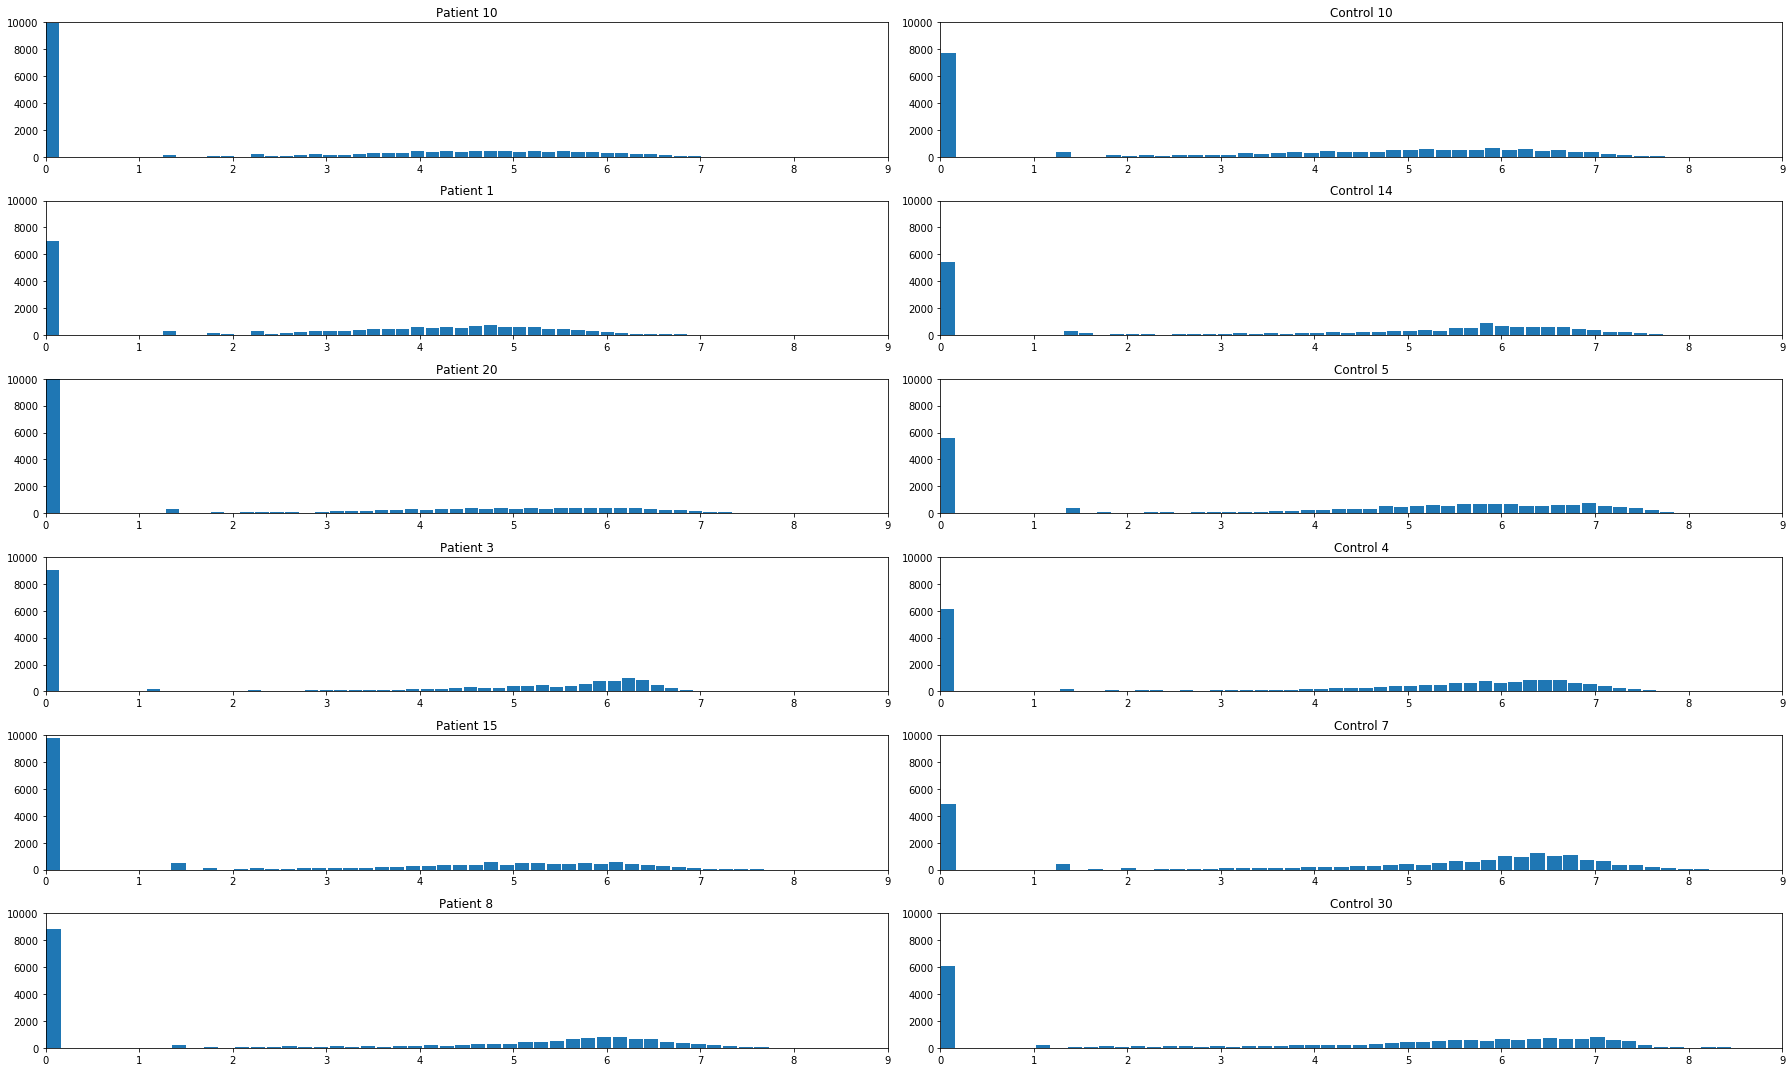

In [27]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7), (ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(25, 15))
ax0.hist(np.log(shizophrenia_p[10]+1), bins = 50, rwidth=0.9)
ax0.set_title('Patient 10')
ax0.set_xlim([0,9])
ax0.set_ylim([0,10000])
ax1.hist(np.log(shizophrenia_c[10]+1), bins = 50, rwidth=0.9)
ax1.set_title('Control 10')
ax1.set_xlim([0,9])
ax1.set_ylim([0,10000])
ax2.hist(np.log(shizophrenia_p[1]+1), bins = 50, rwidth=0.9)
ax2.set_title('Patient 1')
ax2.set_xlim([0,9])
ax2.set_ylim([0,10000])
ax3.hist(np.log(shizophrenia_c[14]+1), bins = 50, rwidth=0.9)
ax3.set_title('Control 14')
ax3.set_xlim([0,9])
ax3.set_ylim([0,10000])
ax4.hist(np.log(shizophrenia_p[20]+1), bins = 50, rwidth=0.9)
ax4.set_title('Patient 20')
ax4.set_xlim([0,9])
ax4.set_ylim([0,10000])
ax5.hist(np.log(shizophrenia_c[5]+1), bins = 50, rwidth=0.9)
ax5.set_title('Control 5')
ax5.set_xlim([0,9])
ax5.set_ylim([0,10000])
ax6.hist(np.log(shizophrenia_p[3]+1), bins = 50, rwidth=0.9)
ax6.set_title('Patient 3')
ax6.set_xlim([0,9])
ax6.set_ylim([0,10000])
ax7.hist(np.log(shizophrenia_c[4]+1), bins = 50, rwidth=0.9)
ax7.set_title('Control 4')
ax7.set_xlim([0,9])
ax7.set_ylim([0,10000])
ax8.hist(np.log(shizophrenia_p[15]+1), bins = 50, rwidth=0.9)
ax8.set_title('Patient 15')
ax8.set_xlim([0,9])
ax8.set_ylim([0,10000])
ax9.hist(np.log(shizophrenia_c[7]+1), bins = 50, rwidth=0.9)
ax9.set_title('Control 7')
ax9.set_xlim([0,9])
ax9.set_ylim([0,10000])
ax10.hist(np.log(shizophrenia_p[8]+1), bins = 50, rwidth=0.9)
ax10.set_title('Patient 8')
ax10.set_xlim([0,9])
ax10.set_ylim([0,10000])
ax11.hist(np.log(shizophrenia_c[30]+1), bins = 50, rwidth=0.9)
ax11.set_title('Control 30')
ax11.set_xlim([0,9])
ax11.set_ylim([0,10000])
fig.tight_layout()


Another common transformation is the log-transformation of the time series. Since there are many zero values, one was added to the data to be able to calculate the natural logarithm. 
Just like the other versions, the log-transformed histograms reveals a high number of zeros. 
Beside the large amount of zeros, the log-transformation reveals a second smaller accumulation of observations located to the right of the histogram. This might indicate, that the data is generated by two different distributions. Due to the knowledge about the nature of the data, one could make the hypothesis that the active and resting periods are generated by different distributions. 
That lets the question arrise how the two different periods are distributed. 

Analysing the distribution of the two different periods is not trivial, since it is not known, when a person is an active or resting phase. 
To get a better insight, the daily structure of the time series and its distribution are analysed. 


## Analysing the daily structure of the data 

In [163]:
#Extract 24h daily structure 
days_c = [np.array([shizophrenia_c[l][i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(shizophrenia_c[l])/(60*24))-1)]) for l in range(0,len(shizophrenia_c))]
days_p = [np.array([shizophrenia_p[l][i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(shizophrenia_p[l])/(60*24))-1)]) for l in range(0,len(shizophrenia_p))]
day_mean_p = [np.mean(days_p[i], axis=0) for i in range(0,len(days_p))]
day_mean_c = [np.mean(days_c[i], axis=0) for i in range(0,len(days_c))]

                                                                    

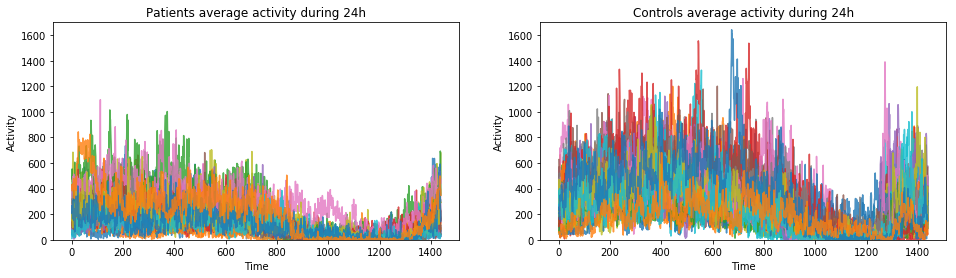

In [180]:
#Histograms --> change to better visualization 
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(16, 4))
ax0.set_title('Patients average activity during 24h')
ax0.set_ylabel('Activity')
ax0.set_xlabel('Time')
ax0.set_ylim([0,1700])
for a in days_p:
    ax0.plot(np.mean(a, axis = 0), alpha= 0.8)
ax1.set_title('Controls average activity during 24h')
ax1.set_ylabel('Activity')
ax1.set_xlabel('Time')
ax1.set_ylim([0,1700])
for a in days_c:
    ax1.plot(np.mean(a, axis = 0), alpha= 0.8)


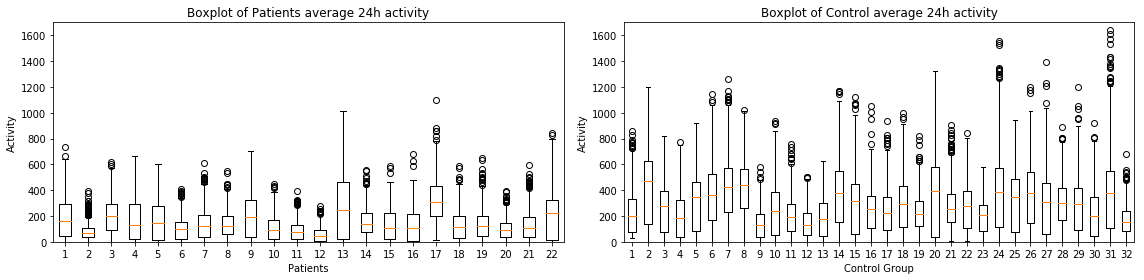

In [179]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(16, 4))
ax0.set_title('Boxplot of Patients average 24h activity')
ax0.set_ylabel('Activity')
ax0.set_xlabel('Patients')
ax0.set_ylim([0,1700])
ax0.boxplot(day_mean_p)
ax1.set_title('Boxplot of Control average 24h activity')
ax1.set_ylabel('Activity')
ax1.set_xlabel('Control Group')
ax1.set_ylim([0,1700])
ax1.boxplot(day_mean_c)
fig.tight_layout()



In [100]:
#Extract 12h structure 9-21 night
daily_c = [np.array([shizophrenia_c[l][i*(60*12):(i+1)*(60*12)] for i in range(0,int(len(shizophrenia_c[l])/(60*12))-1,2)]) for l in range(0,len(shizophrenia_c))]
daily_p = [np.array([shizophrenia_p[l][i*(60*12):(i+1)*(60*12)] for i in range(0,int(len(shizophrenia_p[l])/(60*12))-1, 2)]) for l in range(0,len(shizophrenia_p))]
daily_mean_p = [np.mean(daily_p[i], axis=0) for i in range(0,len(daily_p))]
daily_mean_c = [np.mean(daily_c[i], axis=0) for i in range(0,len(daily_c))]


In [103]:
#Extract 12h structure 21-9 night
night_c = [np.array([shizophrenia_c[l][i*(60*12):(i+1)*(60*12)] for i in range(1,int(len(shizophrenia_c[l])/(60*12))-1,2)]) for l in range(0,len(shizophrenia_c))]
night_p = [np.array([shizophrenia_p[l][i*(60*12):(i+1)*(60*12)] for i in range(1,int(len(shizophrenia_p[l])/(60*12))-1, 2)]) for l in range(0,len(shizophrenia_p))]
night_mean_p = [np.mean(night_p[i], axis=0) for i in range(0,len(night_p))]
night_mean_c = [np.mean(night_c[i], axis=0) for i in range(0,len(night_c))]


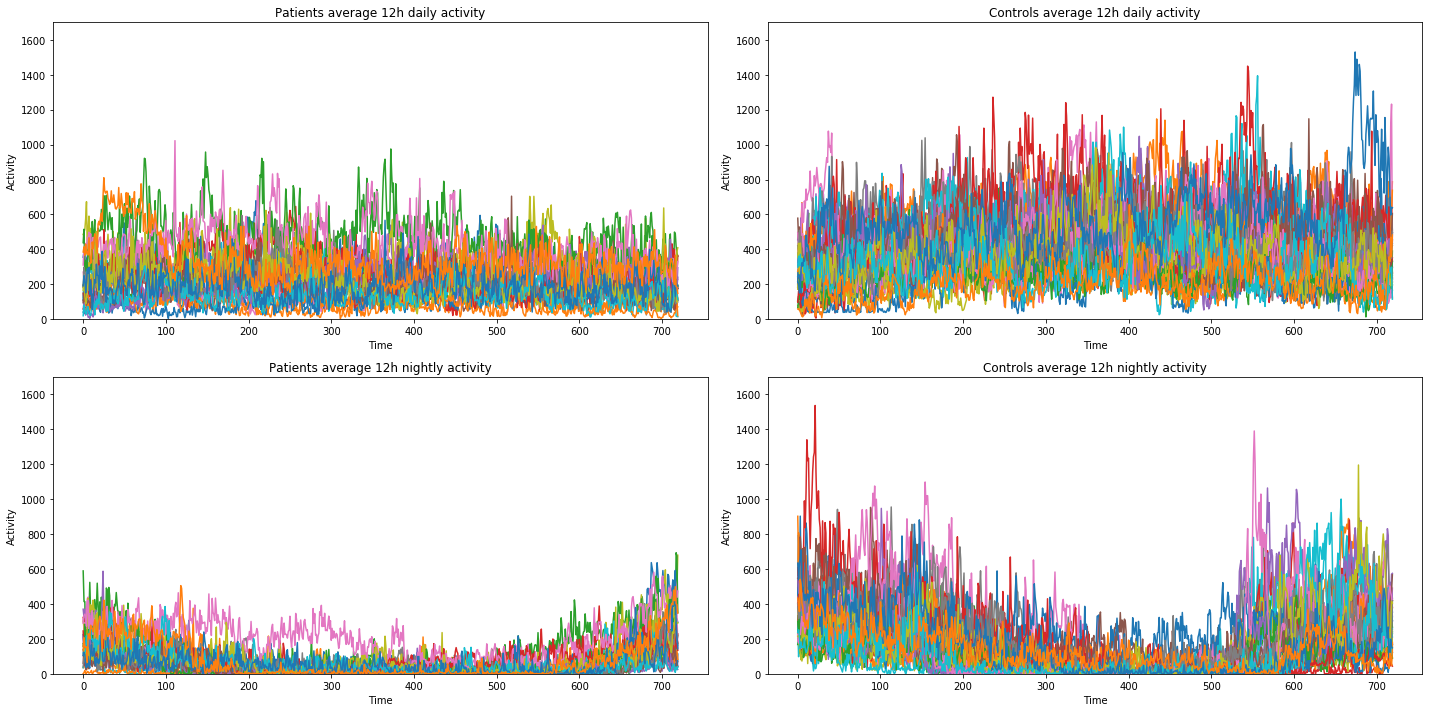

In [182]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2, figsize=(20,10))
ax0.set_title('Patients average 12h daily activity')
ax0.set_ylabel('Activity')
ax0.set_xlabel('Time')
ax0.set_ylim([0,1700])
for a in daily_p:
    ax0.plot(np.mean(a, axis = 0))
ax1.set_title('Controls average 12h daily activity')
ax1.set_ylabel('Activity')
ax1.set_xlabel('Time')
ax1.set_ylim([0,1700])
for a in daily_c:
    ax1.plot(np.mean(a, axis = 0))
    
ax2.set_title('Patients average 12h nightly activity')
ax2.set_ylabel('Activity')
ax2.set_xlabel('Time')
ax2.set_ylim([0,1700])
for a in night_p:
    ax2.plot(np.mean(a, axis = 0))
ax3.set_title('Controls average 12h nightly activity')
ax3.set_ylabel('Activity')
ax3.set_xlabel('Time')
ax3.set_ylim([0,1700])
for a in night_c:
    ax3.plot(np.mean(a, axis = 0))
fig.tight_layout()


{'whiskers': [<matplotlib.lines.Line2D at 0x14fb59e48>,
 'caps': [<matplotlib.lines.Line2D at 0x14fb4c588>,
 'boxes': [<matplotlib.lines.Line2D at 0x14fb5f438>,
 'medians': [<matplotlib.lines.Line2D at 0x14fb3a0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14f59d5c0>,
 'means': []}

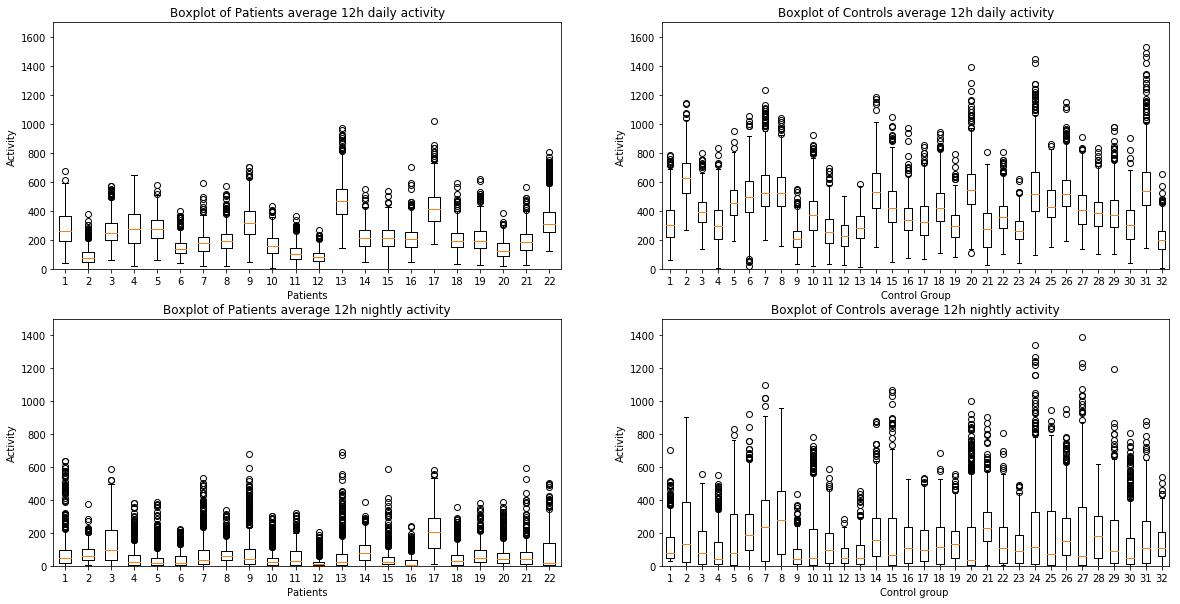

In [181]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2, figsize=(20, 10))
ax0.set_title('Boxplot of Patients average 12h daily activity')
ax0.set_ylabel('Activity')
ax0.set_xlabel('Patients')
ax0.set_ylim([0,1700])
ax0.boxplot(daily_mean_p)
ax1.set_title('Boxplot of Controls average 12h daily activity')
ax1.set_ylabel('Activity')
ax1.set_xlabel('Control Group')
ax1.set_ylim([0,1700])
ax1.boxplot(daily_mean_c)
ax2.set_title('Boxplot of Patients average 12h nightly activity')
ax2.set_ylabel('Activity')
ax2.set_xlabel('Patients')
ax2.set_ylim([0,1500])
ax2.boxplot(night_mean_p)
ax3.set_title('Boxplot of Controls average 12h nightly activity')
ax3.set_ylabel('Activity')
ax3.set_xlabel('Control group ')
ax3.set_ylim([0,1500])
ax3.boxplot(night_mean_c)

(array([ 3.,  1.,  2.,  0.,  5.,  2.,  3.,  2.,  1.,  2.,  5.,  3.,  3.,
         7.,  6., 10.,  8.,  4.,  9., 10., 20., 14., 21., 13., 18., 18.,
        14., 24., 15., 15., 21., 20., 21., 22., 28., 18., 22., 27., 26.,
        29., 29., 30., 48., 25., 33., 24., 25.,  8.,  5.,  1.]),
 array([0.51082562, 0.62822286, 0.74562009, 0.86301733, 0.98041456,
        1.0978118 , 1.21520903, 1.33260627, 1.4500035 , 1.56740073,
        1.68479797, 1.8021952 , 1.91959244, 2.03698967, 2.15438691,
        2.27178414, 2.38918138, 2.50657861, 2.62397584, 2.74137308,
        2.85877031, 2.97616755, 3.09356478, 3.21096202, 3.32835925,
        3.44575649, 3.56315372, 3.68055096, 3.79794819, 3.91534542,
        4.03274266, 4.15013989, 4.26753713, 4.38493436, 4.5023316 ,
        4.61972883, 4.73712607, 4.8545233 , 4.97192054, 5.08931777,
        5.206715  , 5.32411224, 5.44150947, 5.55890671, 5.67630394,
        5.79370118, 5.91109841, 6.02849565, 6.14589288, 6.26329011,
        6.38068735]),
 <a list of 50

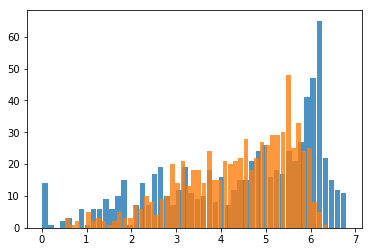

In [186]:
plt.hist(np.log(night_mean_c[1]+1), bins = 50, alpha=0.8, rwidth=0.9)
plt.hist(np.log(night_mean_p[2]+1), bins = 50, alpha = 0.8, rwidth=0.9)

(array([ 2.,  0.,  0.,  0.,  1.,  0.,  3.,  2.,  1.,  1.,  5.,  4.,  4.,
         2.,  4.,  7., 10., 13.,  6., 17., 17., 15., 18., 21., 22., 26.,
        30., 36., 33., 30., 36., 29., 35., 31., 38., 31., 34., 23., 25.,
        10., 20., 16., 13., 13., 12.,  4.,  8.,  3.,  6.,  3.]),
 array([4.22289562, 4.26552244, 4.30814925, 4.35077606, 4.39340288,
        4.43602969, 4.4786565 , 4.52128331, 4.56391013, 4.60653694,
        4.64916375, 4.69179056, 4.73441738, 4.77704419, 4.819671  ,
        4.86229781, 4.90492463, 4.94755144, 4.99017825, 5.03280506,
        5.07543188, 5.11805869, 5.1606855 , 5.20331231, 5.24593913,
        5.28856594, 5.33119275, 5.37381956, 5.41644638, 5.45907319,
        5.5017    , 5.54432681, 5.58695363, 5.62958044, 5.67220725,
        5.71483406, 5.75746088, 5.80008769, 5.8427145 , 5.88534131,
        5.92796813, 5.97059494, 6.01322175, 6.05584856, 6.09847538,
        6.14110219, 6.183729  , 6.22635581, 6.26898263, 6.31160944,
        6.35423625]),
 <a list of 50

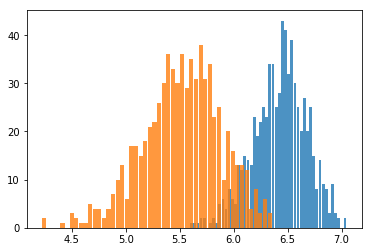

In [187]:
plt.hist(np.log(daily_mean_c[1]+1), bins = 50, alpha=0.8, rwidth=0.9)
plt.hist(np.log(daily_mean_p[2]+1), bins = 50, alpha = 0.8, rwidth=0.9)

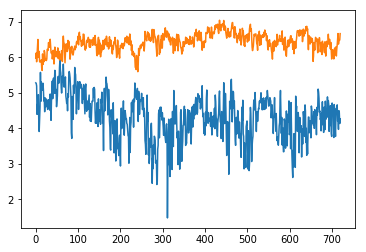

In [193]:
plt.plot(np.log(daily_mean_p[1]+1))
plt.plot(np.log(daily_mean_c[1]+1))